
# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png">  CS207 Final Project Documentation 

Group 16 | Pirates of the SEAS | Michael Downs, Cameron Hickert, Dianne Lee, Wisoo Song 

<hr style="height:2pt">


### Introduction

ARRRtomatic Differentiation is a Python package that implements forward and reverse mode automatic differentiation and several optimization routines using these techniques. Automatic Differentiation solves the problem of exactly computing the derivative (to machine precision) for an arbitrary function as long as that function can be expressed as the composition of elementary functions. Precise computation of the gradient is of fundamental importance in the sciences and applied mathematics. For example, many optimization algorithms rely on gradient information, and are therefore a prime application area for automatic differentiation, especially in a high dimensional setting. Indeed, the backpropagation algorithm, which is used to train neural networks, is simply gradient descent on the network's weights. Optimization algorithms find use in diverse tasks such as airport traffic planning, design of antennae, and portfolio allocation. 

Derivatives are also used in root finding methods such as Newton's method, which are used to numerically solve ordinary differential equations (ODEs) when using implicit methods, among other things. Reliable solutions to ODEs are integral to many of the applied sciences. Finally, gradient information is used in non-linear least squares fitting, which is a common procedure in statistical analysis. Therefore, to be widely useful, our package implements some general optimization routines, root finding, and non-linear least squares fitting. 

Automatic differentiation offers an improvement over finite difference methods in that automatic differentiation is exact to machine precision and does not suffer nearly as much from numerical stability issues. AD is also better than symbolic differentiation in that it is less computationally expensive.

### Background

#### Calculus

A derivative of a function represents the instantaneous rate of change of that function at a particular point. A vector containing each partial derivative of a multivariate function is known as a gradient and gives the direction of greatest increase at a particular point. A Jacobian of a vector-valued function is a matrix where each row contains the gradient of the corresponding function.

The chain rule describes the differentiation of a composite function, where the derivatives are taken at each step as described by the following diagram: 

![chain rule](./figures/chain_rule.png)

#### Forward Mode


Forward-mode automatic differentiation of a function can be conceptualized as 

1. Dividing that function into a composition of elementary operations through a computational graph. Basic elementary operations include:

    1. Addition
    2. Multiplication
    3. Subtraction
    4. Division
    5. Exponentiation
    6. Logarithms
    7. Trigonometric functions
    
2. Iteratively applying the chain rule, a result from calculus for computing the derivative of a composite function, at each step of the computational graph from beginning to end in order to propagate the exact values of the partial derivatives to machine precision all the way until the final step of the computational graph, which represents the output of the function. The partial derivatives at the final step are with respect to the function's variables and so represent the value of the gradient (to machine precision) for a chosen value of the function's variables.


The procedure described above allows for computation of particular classes of multivariate, scalar-valued functions, and can easily be extended to vector-valued functions as well -- simply apply the procedure component-wise to each function.

We illustrate both the graph structure of computations as well as the propagation of the derivatives via the chain rule with an example. As each step in automatic differentiation involves a single elementary function, each of these "steps" can be used as input into an outer function. An example of forward-mode automatic differentiation of the function *sin(2x)* can be seen below, where *x<sub>n</sub>* represents the *n*th step of the function. 

![graph struct](./figures/graph_structure.PNG)

| trace | func        | value   | deriv                 |   dx |
|-------|-------------|---------|-----------------------|-------|
| *x<sub>1</sub>* | *x<sub>1</sub>*       | 5     | 1           |     1 |
| *x<sub>2</sub>* | 2*x<sub>1</sub>*      | 10    | 2d*x<sub>1</sub>*          |     2 |
| *x<sub>3</sub>* | sin(*x<sub>2</sub>*) | -.544 | cos(*x<sub>2</sub>*)*dx<sub>2</sub>* | -1.68 |

Essentially, we divide the composite function sin(2x) into the elementary operations *x<sub>1</sub>*=x, *x<sub>2</sub>*=2*x<sub>1</sub>*, and *x<sub>3</sub>*=sin(*x<sub>2</sub>*), and we maintain the derivatives along the way. 

More generally, forward mode is able to compute the Jacobian of a general vector-valued function. We first introduce a seed vector p in order to calculate the directional derivative in the direction of p. For example, for a simple function *f(x,y)*, p = (1,0) would give us $\frac{d f}{d x}$ while $p = (0,1)$ would give us $\frac{d f}{d y}$. The forward mode calculates the product of the function gradient with this seed vector. 

In particular, the forward mode computes the Jacobian-vector product. The Jacobian matrix is defined $J = \frac{df_i}{ dx_j}$. Thus we can see that the forward mode of automatic differentiation computes the matrix-vector product $Jp$ for the seed vector $p$. 

Given a function $f: \mathbb{R}^m \rightarrow \mathbb{R}^n$, forward mode is more efficient when $n >> m$ as this correponds to the case where the number of functions to evaluate is greater than the number of inputs. 

#### Dual Numbers

It is also useful to give some background on dual numbers. Dual numbers are numbers of the form *a+bε*. In the case of automatic differentiation, the *ε* value can be used to represent the derivative of the function at a particular value *x*. For example, an element *x* would be represented as the vector *(x,x')*. A simple application of a function *f* might look like *f((x,x')) = (f(x), f(x)x')*, making use of the chain rule as described above. 

#### Reverse Mode

Dianne add info here

Reverse mode on the other hand is more efficient when $n << m$, or the number of inputs is larger than the number of functions. Reverse mode in this case computes the product $J^Tp$ instead. 

#### Gradient Descent

Gradient Descent in a simple first-order optimization algorithm that attempt to find $x^* \in \mathbb{R}^n$ such that $f(x^*) \le f(x) \forall x \in  \mathbb{R}^n$. It does so by moving in the direction of steepest descent, $-\nabla f$, the negative of the gradient.

![gd](./figures/gradient_descent.png)

There are variants of gradient descent but, broadly speaking, the algorithm is as follows:

![sgd](./figures/gradient_descent_algo.png)

Oftentimes one wishes to optimize over a loss function with respect to some parameters where the loss function is the sum of losses of individual data points. That is, one wishes to optimize over

$$L(\theta) = \sum_{i=1}^N L_i(x_i; \theta)$$ where $L_i$ is the $ith$ loss function for data point $x_i$.

Instead of taking the gradient of the entire loss function, one can sample a few points randomly, take the gradient with respect to those points, and then take a step using this approximation to the gradient. The SGD algorithm is then:
![sgd](./figures/sgd_algo.png)

In our package, we implement momentum, adagrad, and adam, which are modifications that often improve the performance of GD/SGD.

Momentum uses an exponentially decaying average of the previous gradient descent steps in the update rule. The symmetric cancellation allows the steps to perform better in situations where they would otherwise exhibit a zig-zag pattern.

The update rule becomes (the gradient can be substituted with the mini-batch approximation $\widehat{\nabla f(x)}$:

![momentum](./figures/momentum.png)

AdaGrad scales the step size for each parameter by a quantity which incorporates information on how quickly the function is changing with respect to that parameter. The step size is usually uniform across all parameters, but adaptively scaling the step sizes on a per-parameter basis allows for more robust steps. The adagrad steps are:

![adagrad](./figures/adagrad.png)

Adam combines these two ideas by maintaining an exponentially decaying running average of both the previous gradient steps and square of the gradient, and has the updates:

![adam](./figures/adam.png)

In practice, Adam performs well on a wide variety of loss surfaces.

#### Newton's Method

Newton’s method is an iterative procedure for finding the roots of a function. It works by choosing an initial guess, finding the best linear approximation to the function at that point, and then determining the roots of the linearization, which is an easy problem with a closed-form solution. 

In the univariate case, one can intuit Newton's method as iteratively finding where the tangent to the function at the current guess intersects the x axis and then choosing the intersection point as the next guess:

![newton1d](./figures/newton_1d.png)
![newton1d](./figures/newton_1d_intuition.png)

In the multivariate case, one can analogously use a first order taylor approximation and solves that system for where it equals the zero vector.
![newtonNd](./figures/newton_multivariate.png)

Equating the right hand side above with the 0 vector, we obtain the update:
$$J\Delta x = -F(x)$$

In the general case, the algorithm is: 
![newtonNd](./figures/newton_root_algo.png)

Newton's Method can also be used for optimization -- simply run it on the gradient of a function to find where the first order conditions for optimality are satisfied. In this case, the algorithm becomes:

![newtonNd](./figures/newton_opt_algo.png)

where $H$ is the Hessian.

#### BFGS

BFGS (Broyden-Fletcher-Goldfarb-Shanno) is a Quasi-Newton method that performs Newton-like updates of the form 

$$\Delta x = -B^{-1} \nabla f(x)$$

except $B$ is an approximation of the Hessian that is iteratively updated as more function evaluation are taken.

The BFGS algorithm is (credit to Chris Rycroft):
![bfgs](./figures/bfgs_algo.png)

where

![bfgs](./figures/bfgs_update.png)

A full discussion of where the updates come from is beyond the scope of this documentation and we direct the reader to https://www.stat.cmu.edu/~ryantibs/convexopt/lectures/quasi-newton.pdf.

Because BFGS uses an approximation of the Hessian, it typically has faster convergence than a first order method but slower convergence than a second order method. The benefit of BFGS vs using the full Newton's Method iterations is that it is less costly to perform the B matrix update and one does not need the second order partial derivatives.

#### Levenberg-Marquardt

Levenberg-Marquardt is an iterative algorithm for fitting parameters in a nonlinear least squares problem that improves upon Gauss-Newton, the canonical algorithm for nonlinear least squares fitting, by adding additional stability.

Suppose that we have a response variable $y$ and a collection of covariates $X$ that are related in a non linear manner through the function $d(X; \theta)$ with parameters $\theta$. In nonlinear regression we with to minimize the quantity $\frac{1}{2} \sum_{i=1}^N (y - d(x_i; \theta))^2 = \frac{1}{2} \sum_{i=1}^N (r_i)^2 = \frac{1}{2}||\mathbf{r(\theta)}||^2$. Then, the first order conditions are:

$$
J_r(\theta)^T r(\theta) = 0
$$

Due to the non-linearity, this system does not have a closed-form solution. One can, however, use Newton's method to find the value of $\theta$ that achieves the first order conditions. 

Deriving the Newton updates yields a term containing the product of a second order partial derivative and an element of the residual vector. This term is discarded because determining the second order partial derivative is burdensome and we would expect the components of the residual vector to be small near the root. Finally, a symmetric matrix is added to the left hand side matrix in the Newton updates to increase numerical stability.

The Levenberg-Marquardt algorithm is then:
![](./figures/lm_algo.png)


### How To Use

##### Installation

   We utilized the setuptools module to package and upload our module on PyPI. This method is much more robust than simply freezing the dependencies using 'pip freeze > requirements.txt'. In addition to solving messy dependency issues, including the setup.py allows the package to be directly installed to venv or conda env by running the following code:
    <img src="./figures/pip_install_command.png" alt="drawing" width="250"/><br/>
    Detailed information about the project and python kernel compatibility can be found at: https://pypi.org/project/arrrtomatic/ . Notice that arrrtomatic only supports python kernel 3.6 and up.

<img src="./figures/PyPI.png" alt="drawing" width="400"/>

##### Step-by-step demo of the installation
1. If you have not created an environment for your project, create one. We recommend python 3.6 and conda envs.<br/>
<img src="./figures/conda_create.png" alt="drawing" height="150"/><br/>
2. Activate the environment
<img src="./figures/conda_activate.png" alt="drawing" height="150"/><br/>
3. pip install arrrtomatic <br/>
<img src="./figures/successful_install3.png" alt="drawing" width="550"/><br/>
4. import the module with:<br/>
<center> from ARRRtomatic_diff import Autodiff </center><br/>
<img src="./figures/assertion_success2.png" alt="drawing" width="550"/><br/>

5. Local Testing interface for developers <br/>

 In the project directory, developers could use 'setup.py' with the 'test' option to run test cases locally and simulate user's installation environment. Running the following line finds the test_*.py files from the tests/ folder and runs it with pytest:<br/>
<img src="./figures/setup_test.png" alt="drawing" width="600"/><br/>

##### Using arrrtomatic to differentiate a simple function

In [1]:
import sys
!{sys.executable} -m pip uninstall -y arrrtomatic
!{sys.executable} -m pip install --user arrrtomatic

Uninstalling arrrtomatic-1.0.12:
  Successfully uninstalled arrrtomatic-1.0.12
  Using cached https://files.pythonhosted.org/packages/b8/b6/1b1a7607f9730b6f4218f603721a28a7aa91deeae9b9022923fc91a86201/arrrtomatic-1.0.12-py2.py3-none-any.whl


In [29]:
#Import the modules!
from ARRRtomatic_diff import AutoDiff, AutoDiffVector
from ARRRtomatic_diff.functions import sin, exp, sqrt, log
import numpy as np

Let's determine the derivative of sqrt at x=3.

- Create an AutoDiff object for a variable by passing arguments 'name' and 'val'

In [3]:
x = AutoDiff(name='x', val=3)

print(sqrt(x))

{'val': 1.7320508075688772, 'd_x': 0.2886751345948129}


- The 'val' inside x.trace keeps track of the current value of the variable. The value can be retrieved by calling x.get_value().
- The 'd_(variable name)' inside x.trace records the derivative of the variable with respect to (variable name). 
  

In [4]:
print(x.get_value())
print(x.get_gradient()) # could also call x.get_trace()['d_x']

3
(array([1.]), ['x'])


- The trace table is managed internally by each AutoDiff instance.

In [5]:
y = AutoDiff(name='y', val=4)
z = y * x
print(f"The graident of z is : {z.get_gradient()}")
print(z)
print(y)



The graident of z is : (array([4., 3.]), ['x', 'y'])
{'val': 12, 'd_y': 3, 'd_x': 4}
{'val': 4, 'd_y': 1}


##### Using arrrtomatic to differentiate a vector

We now demonstrate how to use the AutoDiffVector class. 

In [48]:
x1 = AutoDiff(name='x1', val=-1)
x2 = AutoDiff(name='y1', val=3)

Note that AutoDiffVector is created from an iterable of AutoDiff instances.

In [49]:
u = AutoDiffVector((x1, x2))
v = AutoDiffVector((-x2, x1))
q = [2, 1.5]

w = u+q
print(w)
print((w).val == [1, 4.5])
#Can verify that our module appropriately calculates 
#the derivative of a constant vector
J, order = (w).get_jacobian()  
print(J)

[{'val': 1, 'd_x1': 1},{'val': 4.5, 'd_y1': 1}]
[ True  True]
[[1. 0.]
 [0. 1.]]


Now let's try a more useful case where we differentiate a AutoDiffVector with its elements are expressed in more than one variable. Note that our Jacobian follows the column vector convention.

In [47]:
w2 = u+v   # [x1] + [-x2]  = [x1-x2] ==> expressed in column form to make it easier to visualize
           # [x2]   [x1 ]    [x2+x1]

Calculating the Jacobian of this should give  $$\begin{pmatrix} \frac{\partial (x_{1}-x_{2})}{\partial x_{1}} & \frac{\partial (x_{1}-x_{2})}{\partial x_{2}} \\ \frac{\partial (x_{2}+x_{1})}{\partial x_{1}} & \frac{\partial (x_{2}+x_{1})}{\partial x_{2}} \end{pmatrix}   = \begin{pmatrix} 1 & -1 \\ 1 & 1 \end{pmatrix}$$
    

In [23]:
J2, order = w2.get_jacobian() # 

print(J2)

[[ 1. -1.]
 [ 1.  1.]]


##### Using arrrtomatic for Newton's Method

In [6]:
def f(x, g):
    x = AutoDiff(name='x', val=x)
    auto_diff_results = g(x)
    return auto_diff_results.get_value(), auto_diff_results.get_trace()['d_x']

def do_newtons_method(x, f,g, tol=1e-6, verbose=0):
    """
    x: initial guess
    f: function that returns value and derivative of f at x
    tol: terminate when the absolute value of f at x is less than or equal to the tol
    """
    num_iters = 1
    while abs(f(x,g)[0]) > tol:
        val, deriv = f(x,g)

        if verbose > 0:
            print(f"Iteration {num_iters} | x: {x:2f} | f(x): {val:2f} | deriv: {deriv:2f}")
        x = x - val/deriv
        num_iters += 1

    if verbose > 0:
        print(f"Converged to {x} after {num_iters} iterations\n")

    return x



In [7]:
sin1=do_newtons_method(0.2, f, sin,verbose=1)
sin2=do_newtons_method(2.2, f, sin, verbose=1)
sqrt1=do_newtons_method(0.2, f, log,verbose=1)

Iteration 1 | x: 0.200000 | f(x): 0.198669 | deriv: 0.980067
Iteration 2 | x: -0.002710 | f(x): -0.002710 | deriv: 0.999996
Converged to 6.634450606078646e-09 after 3 iterations

Iteration 1 | x: 2.200000 | f(x): 0.808496 | deriv: -0.588501
Iteration 2 | x: 3.573823 | f(x): -0.418897 | deriv: -0.908034
Iteration 3 | x: 3.112500 | f(x): 0.029089 | deriv: -0.999577
Iteration 4 | x: 3.141601 | f(x): -0.000008 | deriv: -1.000000
Converged to 3.141592653589793 after 5 iterations

Iteration 1 | x: 0.200000 | f(x): -1.609438 | deriv: 5.000000
Iteration 2 | x: 0.521888 | f(x): -0.650303 | deriv: 1.916121
Iteration 3 | x: 0.861273 | f(x): -0.149344 | deriv: 1.161072
Iteration 4 | x: 0.989899 | f(x): -0.010153 | deriv: 1.010204
Iteration 5 | x: 0.999949 | f(x): -0.000051 | deriv: 1.000051
Converged to 0.9999999986897259 after 6 iterations



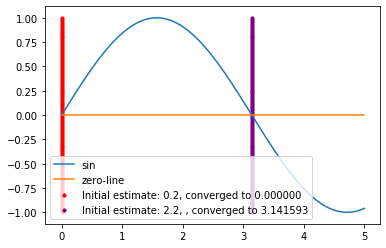

In [8]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
x_s =np.linspace(0, 5, 500)
y_s =np.linspace(-1,1, 100)

sin_dots = np.sin(x_s)
plt.plot(x_s,sin_dots)
plt.plot(x_s,[0]*500)
plt.scatter([sin1]*100, y_s, color="red", s=10)
plt.scatter([sin2]*100, y_s, color="purple", s=10)
plt.legend(["sin", "zero-line", f"Initial estimate: 0.2, converged to {sin1:2f}", f"Initial estimate: 2.2, , converged to {sin2:2f}"])

##### Using arrrtomatic for optimization

Let's import some more modules to visualize how our optimization
module performs

In [24]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

In [40]:
from ARRRtomatic_diff import optimization
from ARRRtomatic_diff.optimization.gradient_descent import *

Below is just the Rosenbrock function

In [36]:
def rosen(x, y):
    term1 = 100 * (y - x ** 2) ** 2
    term2 = (1 - x) ** 2

    total = term1 + term2
    return total

The following 3 methods are just for visualizing purposes

In [37]:
def render_descent(length, w_path, dims=2):
    """
    redering descent path with updates

    length is # of points for the line.
    dims is dimensions in the mapping space
    """
    x0, y0 = w_path[0]
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.array([x0,y0, rosen(x0,y0)])
    for index in range(1, length):
        x, y = w_path[index]
        z = rosen(x, y)
        lineData[:, index] = np.array([x,y,z])

    return lineData

def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

def update_lines2(num, dataLines, lines, dataLines2, lines2):
    for line, data, line2, data2 in zip(lines, dataLines,lines2, dataLines2):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        line2.set_data(data2[0:2, :num])
        line2.set_3d_properties(data2[2, :num])
    return lines, lines2

Let's plot the meshgrid of the Rosenbrock function

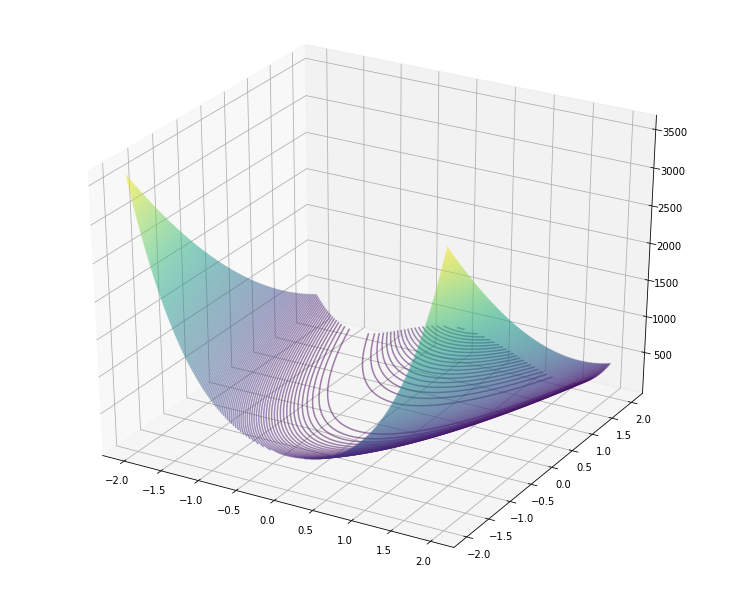

In [38]:
# attaching 3D axis
fig = plt.figure(figsize=(10,8))
ax = p3.Axes3D(fig)

num_points = 3000
x = np.linspace(-2.0, 2.0, num_points)
y = np.linspace(-2.0, 2.0, num_points)
X, Y = np.meshgrid(x,y)
# print(X)
z = [rosenbrock((x[i], y[i]))[0].get_value() for i in range(num_points)]

Z = rosen(X, Y)

ax.contour3D(X,Y,Z, 200, alpha=0.5)

- do_gradient_descent performs gradient descent with many options. You can also set use_momentum=True to enable momentum.

In [59]:
w0 = np.array([-1.9,1.96])#initial point
                            #function to descend upon  = rosenbrock          
gd_path = do_gradient_descent(w0, rosenbrock, max_iter=num_points, step_size=0.0015, show=True)

Did not converge after 3000 steps


- The code below takes about 5 minutes on MacBookAir (due to video rendering). If you want to see the video right away, check under '/docs/figures/'GRRRadient_Descent_no_momentum.mp4' OR <br/>
'/docs/figures/'GRRRadient_Descent_momentum.mp4'

In [64]:
batch = 1000
frame = 60
interval = 30
data = [render_descent(frame, gd_path, 3) for index in range(batch)]

# Had to do the following because can't pass 3d vector to ax.plot
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], color="red")[0] for dat in data]

ax.set_xlim3d([-2.0, 2.0])
ax.set_xlabel('X')
ax.set_ylim3d([-2.0, 2.0])
ax.set_ylabel('Y')
ax.set_zlim3d([0.0, 2500.0])
ax.set_zlabel('Z')
ax.set_title('GRRRADIENT Descent! (Global Minimum = (0,0))')

# Rendering the animation!
#                                  fig  func to update frame      updated func's args, interval
line_ani = animation.FuncAnimation(fig, update_lines, frame, fargs=(data, lines),
                                   interval=interval, blit=False)
Writer = animation.FFMpegWriter()
ax.plot3D([0], [0], [0], marker='x', color='green')
ax.legend([f'Starting point: ({-1.9}),({1.96}), no Momentum'], loc='upper right')
##make sure you have ffmpeg installed!
print(animation.writers.list())
# uncomment this line if you want to save the video
line_ani.save('GRRRadient_Descent_no_momentum.mp4', writer=Writer)

['ffmpeg', 'ffmpeg_file', 'imagemagick', 'imagemagick_file', 'html']


The resulting video will look similar to this:

In [72]:
from IPython.display import Video
Video("./figures/GRRRadient_Descent_no_momentum.mp4", width=500)

In [71]:
Video("./figures/GRRRadient_Descent_momentum.mp4", width=500)

#### Software Organization 

At a high level, our software is organized into implementation, documentation, and tests. Our package is organized into two main modules which house the AutoDiff object and the elementary functions, respectively. The functions reside in a subpackage for stylistic reasons so that users can explicitly import these functions from \"ARRRtomatic_diff.functions\"\n",

A more detailed directory structure is as follows:
```
. 
├── ARRRtomatic_diff 
│   ├── __init__.py
│   ├── auto_diff.py 
│   └── functions <br>
│       ├── __init__.py 
│       └── funcs.py
├── LICENSE.txt
├── README.md 
├── docs 
│   ├── Milestone 2 Documentation.ipynb
│   ├── milestone1.md 
│   └── next_steps.md
├── driver_script.py
├── requirements.txt
├── setup.cfg
├── setup.py
└── tests 
    ├── __init__.py
    ├── test_elementaryoperations.py
    ├── test_instantiation.py
    ├── test_intermediateoperations.py
    └── test_trigs.py
```

The basic modules are auto_diff.py and funcs.py. auto_diff.py contains the AutoDiff object, which uses operator overloading to implement forward mode automatic differentiation for elementary arithmetic operations. The overloaded operations use duck typing to update the values and partial derivatives correctly depending on whether the other term is an AutoDiff object or a numeric. funcs.py defines elementary functions such as exp and trig functions which use duck typing to appropriately update the value and gradient for supplied AutoDiff objects or simply perform the elementary computation if the argument is a numeric. 

We follow PEP 257 https://www.python.org/dev/peps/pep-0257/ for our docstrings. Because of our extensive unit tests, we do not use doctests.

The tests reside in a directory at the same level as our ARRRtomatic_diff directory and are run via pytest. They are integrated via Travis CI and CodeCov.

We use setuptools (https://packaging.python.org/tutorials/packaging-projects/) to package our software. 

See the previous section for a discussion of how to install and use the package. We use PyPI for our remote server for distribution. Hence, our package can easily be installed with pip.

#### Implementation Details

We implemented the forward mode of automatic differentiation through operator overloading and defining custom functions for cases where operator overloading does not make sense (i.e. exp, sin, etc.). That is, for each of the elementary operations (add, subtract, etc.), we overloaded the appropriate dunder method in our AutoDiff class. Note that for each of the elementary operations, this also included overloading the reverse operands (`__rmul__`, `__radd__`, etc.). The overloaded methods appropriately update both the value and all the partial derivatives. We accounted only for the real numbers and throw exceptions for cases where the derivative is not defined (division by zero, log of a negative number, etc.).

<img src="./figures/operations.png" alt="drawing" width="500"/>

Our core class, AutoDiff, is a representation of a particular row in the trace table, which in turn corresponds to a step in the computational graph. Users interact with it by instantiating named variables that represent root nodes in the computational graph (which corresponds to the inputs to the *n* initial rows of the trace table, where *n* represents the number of input variables). Users can then create arbitrarily complicated functions by manipulating these variables with elementary operations. At every step, the AutoDiff object handles maintaining the derivatives and the function value. Once the user has finished composing a function, the final derived AutoDiff object corresponds to the final row in the trace table and has the function value and gradient.


For example:

```python
from ARRRtomatic_diff import AutoDiff
from ARRRtomatic_diff.functions import sin, exp, sqrt, log

x = AutoDiff(name='x', val=2)
y = AutoDiff(name='y', val=-2)
z = AutoDiff(name='z', val=10)

a = z*exp((x - y)**2 / z)

print(a)
{'val': 49.53032424395115, 'd_z': -2.9718194546370693, 'd_y': -39.62425939516092, 'd_x': 39.62425939516092}
```

The currently implemented operations are:
* addition
* multiplication
* subtraction
* division
* exponentiation

Most other dunder methods will operate directly on the "val" attribute in the trace dictionary (representing the value of the function composition) and will not use the derivatives. For example, if the val is 5, division modulo 2 will return 1.

The AutoDiff class has the properties trace and named_variables. Trace is a dictionary which keeps track of both the gradient and the current value of the function. named_variables is a set which keeps track of all variable names seen thus far in all of AutoDiff objects in the trace table.

The AutoDiff class exposes a few methods to access these properties, namely get_trace, get_named_variables, get_value, and get_gradient. The user can access get_gradient when they have finished writing their computational graph to get the final partials. The AutoDiff class also has the corresponding properties variables, val, and gradient as another way to access trace and named_variables. 

```python
print(a.get_trace())
{'val': 49.53032424395115, 'd_x': 39.62425939516092, 'd_z': -2.9718194546370693, 'd_y': -39.62425939516092}
print(a.get_named_variables())
{'x', 'z', 'y'}
print(a.get_value())
49.53032424395115
print(a.get_gradient())
{'d_x': 39.62425939516092, 'd_z': -2.9718194546370693, 'd_y': -39.62425939516092}
```

The AutoDiff class handles combining two AutoDiff variables through the "private" __update_binary_autodiff method. This function takes as arguments the other AutoDiff object and the rule for updating the the values and the derivatives. The rule for updating the values will be a function of the two values of the AutoDiff objects. The rule for updating the derivatives is a function of the values of the two AutoDiff objects and the relevant partial derivatives as well. This method will combine the named variables for both AutoDiff objects as well. The result is a new AutoDiff object with an updated trace and set of named variables. There is another function, __update_binary_numeric, which handles creating an updated AutoDiff object in case that the other argument is a numeric primitive, which also returns an updated AutoDiff object. This other method also takes as argument an update rule for the values and derivatives but, because the numeric is a constant, some simplifying assumptions are made for the update rule for the derivative.

For example, for multiplication, the update rules are:

```python
@staticmethod
def __mul(x, y):
    return x * y

@staticmethod
def __dmul(x, y, dx, dy):
    return dx*y + x*dy
```

and when an AutoDiff object is multiplied by another entity, the following overloaded dunder method gets called:

```python
def __mul__(self, other):
    try:
        return self.__update_binary_autodiff(other, AutoDiff.__mul, AutoDiff.__dmul)
    except AttributeError:
        return self.__update_binary_numeric(other, AutoDiff.__mul, AutoDiff.__dmul)
```

If a numeric, say, 4.3, were multiplied, dy would be set to 0 for the above derivative update rule.  

Instantiating the AutoDiff object requires passing in certain named arguments which change depending on the context. We assume that our AutoDiff object will be will only ever be initialized in exactly one of two contexts. The user should only ever interact with the first context. Those wishing to extend the library will need to understand the second context.

The contexts are: 

1. A user creates an AutoDiff object for the first time in which case the arguments 'name' and 'val' are passed. 'name' in this case is a string representing the variable name and 'val' is a numeric representing the value of the variable. 
2. A call from inside a function corresponding to an elementary operation, in which case the trace is assumed to have been pre-computed and the arguments are 'trace' and 'name'. 'trace' is a dictionary with the function value and partial derivatives. 'name' in this case is a set of variable names.

The elementary operations, which reside in funcs.py, interact with the AutoDiff object in a similar manner, and update them via the "private" __update_unary(x, operation, doperation) method while takes as input an AutoDiff variable or primitive numeric and the rules for updating the value and partial derivatives.

For example, the update rules for sin would be:

```python
def sin(x):
    return __update_unary(x, np.sin, np.cos)
```


We use NumPy for elementary computations. Beyond benefitting our package with its speed and versatility, NumPy's prevalence among the Python programming community will allow those interested to more easily understand how our packages operates "under the hood," especially to understand which operators we have overloaded.  

Beyond NumPy, our package does not have other external dependencies. We use pytest for the tests.

The currently implemented elementary functions are:
* exp
* log
* sqrt
* sin
* cos
* tan
* csc
* sec
* cot
* arcsin
* arccos
* arctan
* arccsc
* arcsec
* arccot
* sinh
* cosh
* tanh
* csch
* sech
* coth
* arcsinh
* arccosh
* arctanh
* arccsch
* arcsech
* arccoth


We have not yet accounted for vector-valued functions. We plan to implement this by creating another class, AutoDiffVector, that combines AutoDiff variable. 

In addition to this, we plan on implementing reverse mode, newton's method, and possibly some optimization routines. 

#### Future Features 

##### Vector valued functions
We plan to extend our current implementation to be able to handle vector valued functions. We will do so by creating a convenience class, AutoDiffVector, that takes a collection of AutoDiff objects and supports broadcasting operations (i.e. scalar operations or vector arithmetic when performing algebraic operations with other AutoDiffVector objects). This class will perform the bookkeeping that keeps track of all of the variables across each function and will also have convenience methods for accessing the Jacobian. We expect that this addition will entail adding a new class to auto_diff.py and the software structure will otherwise not change. Possible challeneges include figuring out design considerations such as whether we will want the AutoDiffVector's dimensions to be mutable.

Example usage:

```python
from ARRRtomatic_diff import AutoDiff, AutoDiffVector
from ARRRtomatic_diff.functions import sin, exp, sqrt

x = AutoDiff(name='x', val=-1)
y = AutoDiff(name='y', val=3)

u = AutoDiffVector((x,y))
v = AutoDiffVector((-y,x))

# performs vector addition, scalar multiplication, and broadcasts the 
# unary operator sin element-wise
z = sin(5*(u + v))

# a numpy array representnug the Jacobian of the vector-valued function
# f1 = x - y
# f2 = y + x
J = z.get_jacobian() 
```


##### Newton's method
We plan to implement Newton's method and possibly other root finding / optimization routines such as SGD (and the special case of backpropagation), time permitting. for an arbitrary vector valued function. We will do so by creating a subpackage, optimization, which will contain modules that implement the optimization routines via functions. For Newton's Method, we will compute the Jacobian/derivative through our AutoDiffVector/AutoDiff objects and use numpy to solve the linear system in the multivariate setting. We do not foresee many challenges in implementing newton's method. 

Example usage:
```python
from ARRRtomatic_diff import AutoDiff
from ARRRtomatic_diff.functions import sin
from ARRRtomatic_diff.optimization import newton

def f(x):
    x = AutoDiff(name='x', val=x)

    auto_diff_results = sin(x)

    return auto_diff_results['val'], auto_diff_results['d_x']
    
do_newtons_method(0.2, f, verbose=1)
Iteration 1 | x: 0.200000 | f(x): 0.198669 | deriv: 0.980067
Iteration 2 | x: -0.002710 | f(x): -0.002710 | deriv: 0.999996
Converged to 6.634450606078646e-09 after 3 iterations
```

##### Reverse mode
We plan to implement the reverse mode as an alternative to forward mode. We will do so by creating another AutoDiff class, AutoDiffRev, and the corresponding reverse AutoDiffVector, AutoDiffVectorRev. The API will be mostly the same - the computational graph will be explicitly constructed via algebraically combining AutoDiffRev variables. The intermediate forward pass values and partials will be calculated through these operations as well as the graph dependency structure. For example:

```python
from ARRRtomatic_diff import AutoDiffRev

x = Var(1)
y = Var(2)
z = x * y
z.partial = 1.0

print(z.value)
print(x.partial)
```

In the above code, the multiplication of x and y keeps track of the forward pass evaluations and immediate partials and also specifies z as a child node of x and y in the dependency graph. Each AutoDiffRev variable will keep track of the operations that it's used in. Unlike our forward mode implementation, dz/dx and dz/dy are maintained in the x and y variables, so they must be kept around. The computation of the partial derivatives of the output with respect to the input is performed recursively. 

The primary challenges to implementing reverse mode will be making the API elegant for the vector-valued case, working with a different mental model for automatic differentiation, and making our reverse mode implementation work with our optimization routines. Our implementation of reverse mode will require adding two additional classes, AutoDiffRev and AutoDiffVectorRev to auto_diff.py. We do not expect to add any new modules. 


##### Checks to ensure that variables of the same name have the same initial value
Currently, we have a rudimentary check to verify that user isn't attempting to combine two AutoDiff variables that have the same named variable but with differing values. It's still possible for a user to create an AutoDiff object with a named variable, perform operations on it, and then combine it with another AutoDiff object with the same named variable but with a different value. We plan to make our software throw an exception when this happens. This will require modifying AutoDiff to keep track of the initial values for each variable and then perform a check when attempting to combine two AutoDiff objects.

Example:

```python
from ARRRtomatic_diff import AutoDiff
from ARRRtomatic_diff.functions import sin

x1 = AutoDiff(name='x', val=1)
x2 = AutoDiff(name='x', val=3)

# will throw an exception
x1 + x2

# does not throw an exception but should
(x1 + x1) + x2
```


* Improve AutoDiffVector interface -- use *args and **kwargs
* Make AutoDiffVector more flexible -- make it mutable
* Add more vector operations like norm, transpose, sum, etc.
* Make AutoDiffVector more flexible when doing matrix - vector products
* Add support for AutoDiffMatrix / AutoDiffTensor and general neural network operations
* Add support for differentiation of non-differentiable everywhere functions via subgradient methods
* Code optimizations 
* Interface for entering strings